## Linear Regression - Iris Data

<style>
    body {
        font-family: "Times New Roman", serif;
    }
</style>

### __Dataset Information__
> #### __Context__
&nbsp;&nbsp;&nbsp;&nbsp; Based on Fisher's linear discriminant model, this data set became a typical test case for many statistical classification techniques in machine learning such as support vector machines.


<style>
    body {
        font-family: "Times New Roman", serif;
    }
</style>

> ### __Content__
 &nbsp;&nbsp;&nbsp;&nbsp; The __Iris flower data set__ or __Fisher's Iris data set__ is a multivariate data set introduced by the British statistician and biologist __Ronald Fisher__ in his 1936 paper *The use of multiple measurements in taxonomic problems* as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

 &nbsp;&nbsp;&nbsp;&nbsp; The data set consists of __50 samples__ from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

### Step 1: Data Preprocessing
The analysis begins by importing essential libraries for data manipulation, visualization, and machine learning. This includes __Pandas__ for data manipulation, __Matplotlib__ and __Seaborn__ for visualization, and __Scikit-Learn__ for model building.

### Importing Dataset

In [305]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Load the Dataset
Load the Iris dataset, which contains information on 150 iris flowers from three species: Setosa, Versicolor, and Virginica. Each sample includes four features: sepal length, sepal width, petal length, and petal width.

In [306]:
file_path = r'C:\Users\HP\Downloads\IrisData.csv'
dataset = pd.read_csv(file_path)

In [307]:
dataset.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


#### Loading dataset (assuming it's a CSV file named 'IrisData.csv')

In [308]:
iris_data = pd.read_csv('IrisData.csv', header=None)

### Step 3: Labeling and Rearrangement of dataset
Labelling the dataset to easily identify the data of every columns. Also rearranging it by putting the __Dependent Variable__ in the last column.

#### Putting column labels

In [309]:
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

#### Rearrangement of columns so that 'petal_length' is moved to the last position

In [310]:
cols = ['sepal_length', 'sepal_width', 'petal_width', 'species', 'petal_length']
rearranged_iris_data = iris_data[cols]

#### Save the rearranged dataset to a new CSV file if needed

In [311]:
rearranged_iris_data.to_csv('Rearranged_IrisData.csv', index=False)

#### Rearrangement and First row Label Display

In [312]:
rearranged_iris_data.head()

,sepal_length,sepal_width,petal_width,species,petal_length
0,5.1,3.5,0.2,Iris-setosa,1.4
1,4.9,3.0,0.2,Iris-setosa,1.4
2,4.7,3.2,0.2,Iris-setosa,1.3
3,4.6,3.1,0.2,Iris-setosa,1.5
4,5.0,3.6,0.2,Iris-setosa,1.4


### Step 4: Data Preprocessing

 __Check for missing values:__ Use .isnull().sum() to verify the data integrity.

In [313]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### __Data Preprocessing:__ Handle outliers (example: using Z-score method)

In [314]:
from scipy import stats
z_scores = np.abs(stats.zscore(iris_data.select_dtypes(include=[np.number])))
iris_data = iris_data[(z_scores < 3).all(axis=1)]  # Keep rows where all Z-scores are less than 3

### Step 5: Feature Selection and Splitting Data
Select features __(independent variables)__ and target label __(dependent variable)__.
> #### Independent variables

In [315]:
X = iris_data[['sepal_length', 'sepal_width', 'petal_width']]  

> #### Dependent variable

In [316]:
y = iris_data['petal_length']  

In [317]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Splitting data into training and testing sets (80% train, 20% test)

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [319]:
X_train

array([[-0.89892658,  0.60832167, -0.92594675],
       [-0.53659999,  2.03947844, -1.05746826],
       [-0.29504894, -0.10725672,  0.38926837],
       [-1.26125316,  0.8468478 , -1.32051128],
       [-1.0197021 ,  1.08537392, -0.79442524],
       [-1.14047763, -1.29988735,  0.65231139],
       [ 1.27503292,  0.13126941,  0.38926837],
       [-0.77815105,  0.8468478 , -1.32051128],
       [-1.0197021 ,  1.32390005, -1.32051128],
       [-0.41582447,  2.75505682, -1.32051128],
       [-0.29504894, -0.58430897,  1.04687592],
       [ 1.03348186,  0.13126941,  0.38926837],
       [ 0.55037975, -1.77693961,  0.12622534],
       [-0.89892658,  1.08537392, -1.18898977],
       [-0.53659999,  1.56242618, -1.32051128],
       [-0.05349788, -0.8228351 , -0.00529617],
       [ 0.55037975, -0.58430897,  0.38926837],
       [ 1.15425739,  0.36979554,  1.44144046],
       [ 1.15425739, -0.58430897,  0.25774685],
       [ 1.6373595 ,  1.32390005,  1.70448348],
       [-0.17427341, -0.34578284,  0.126

In [320]:
X_test

array([[ 0.67115528, -0.34578284,  0.12622534],
       [-0.89892658,  1.80095231, -1.18898977],
       [ 2.24123713, -1.06136123,  1.44144046],
       [-0.17427341, -1.06136123, -0.26833919],
       [ 1.03348186, -0.10725672,  0.65231139],
       [-0.77815105,  2.51653069, -1.45203279],
       [ 1.03348186,  0.13126941,  0.25774685],
       [ 1.27503292,  0.13126941,  1.44144046],
       [-0.29504894, -1.29988735, -0.13681768],
       [ 0.18805317, -0.8228351 ,  0.52078988],
       [ 0.79193081,  0.36979554,  1.04687592],
       [-1.26125316, -0.10725672, -1.45203279],
       [-1.14047763,  0.13126941, -1.45203279],
       [-1.14047763,  0.13126941, -1.45203279],
       [-0.53659999,  0.8468478 , -1.32051128],
       [-1.14047763, -1.53841348, -0.26833919],
       [ 0.67115528,  0.13126941,  0.7838329 ],
       [ 0.06727764,  0.36979554,  0.7838329 ],
       [ 0.55037975,  0.60832167,  0.52078988],
       [ 0.67115528, -0.58430897,  1.30991895],
       [-1.26125316,  0.13126941, -1.320

In [321]:
y_train

23     1.7
16     1.3
66     4.5
11     1.6
43     1.6
      ... 
72     4.9
107    6.3
14     1.2
93     3.3
103    5.6
Name: petal_length, Length: 119, dtype: float64

In [322]:
y_test

74     4.3
19     1.5
118    6.9
79     3.5
77     5.0
32     1.5
65     4.4
141    5.1
69     3.9
83     5.1
110    5.1
12     1.4
37     1.5
9      1.5
20     1.7
57     3.3
137    5.5
70     4.8
56     4.7
132    5.6
30     1.6
124    5.7
27     1.5
128    5.6
129    5.8
145    5.2
111    5.3
102    5.9
46     1.6
31     1.5
Name: petal_length, dtype: float64

#### Making the prediction of a single data point with SL = 5.1, SW = 3.5 , PW = 1.0

In [323]:
single_data_point = np.array([[5.1, 3.5, 1.0]])
single_data_point_scaled = scaler.transform(single_data_point)
single_prediction = model.predict(single_data_point_scaled)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [324]:
print(f"The predicted petal length for the input data point is: {single_prediction[0]}")

The predicted petal length for the input data point is: 2.632340268467631


### Step 6: Model Selection and Training

#### Create a linear regression model

In [325]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#### Train the model

In [326]:
model.fit(X_train, y_train)

LinearRegression()

### Step 7: Model Evaluation

#### Make predictions on the test set

### Inference

In [327]:
y_pred = model.predict(X_test)
y_pred

array([4.42761668, 1.40627666, 7.0548404 , 3.66666445, 5.17150862,
       0.98907525, 4.66482023, 6.13554383, 3.80549299, 4.70455795,
       5.33342228, 1.41618862, 1.42436086, 1.42436086, 1.74359495,
       3.20717022, 5.03124848, 4.59627098, 4.53201653, 5.81630975,
       1.49750335, 5.56245359, 1.53019232, 5.66930897, 5.39379929,
       6.0535133 , 5.44099345, 6.0549449 , 1.25927588, 2.03759651])

In [328]:
y_test 

74     4.3
19     1.5
118    6.9
79     3.5
77     5.0
32     1.5
65     4.4
141    5.1
69     3.9
83     5.1
110    5.1
12     1.4
37     1.5
9      1.5
20     1.7
57     3.3
137    5.5
70     4.8
56     4.7
132    5.6
30     1.6
124    5.7
27     1.5
128    5.6
129    5.8
145    5.2
111    5.3
102    5.9
46     1.6
31     1.5
Name: petal_length, dtype: float64

### Evaluation Metrics
#### Calculate R-squared (coefficient of determination)

In [329]:
r2 = r2_score(y_test, y_pred)
r2

0.963879589937206

### Adjusted R-Squared

In [330]:
k = X_test.shape[1]
k

3

In [331]:
n = X_test.shape[0]
n

30

In [332]:
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2 

0.959711850314576

#### Calculate Mean Squared Error (MSE)

In [333]:
mse = mean_squared_error(y_test, y_pred)

#### Display the evaluation metrics

In [334]:
print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

R-squared: 0.96
Mean Squared Error: 0.12


### Step 8: Interpretation
#### Get the coefficients of the model

In [335]:
coefficients = model.coef_

#### Coefficients Display with corresponding feature names

In [336]:
for feature, coef in zip(['sepal_length', 'sepal_width', 'petal_width'], coefficients):
    print(f'Coefficient for {feature}: {coef:.2f}')

Coefficient for sepal_length: 0.61
Coefficient for sepal_width: -0.28
Coefficient for petal_width: 1.12


### Step 9: Visualization
#### Pairplot to visualize relationships between features

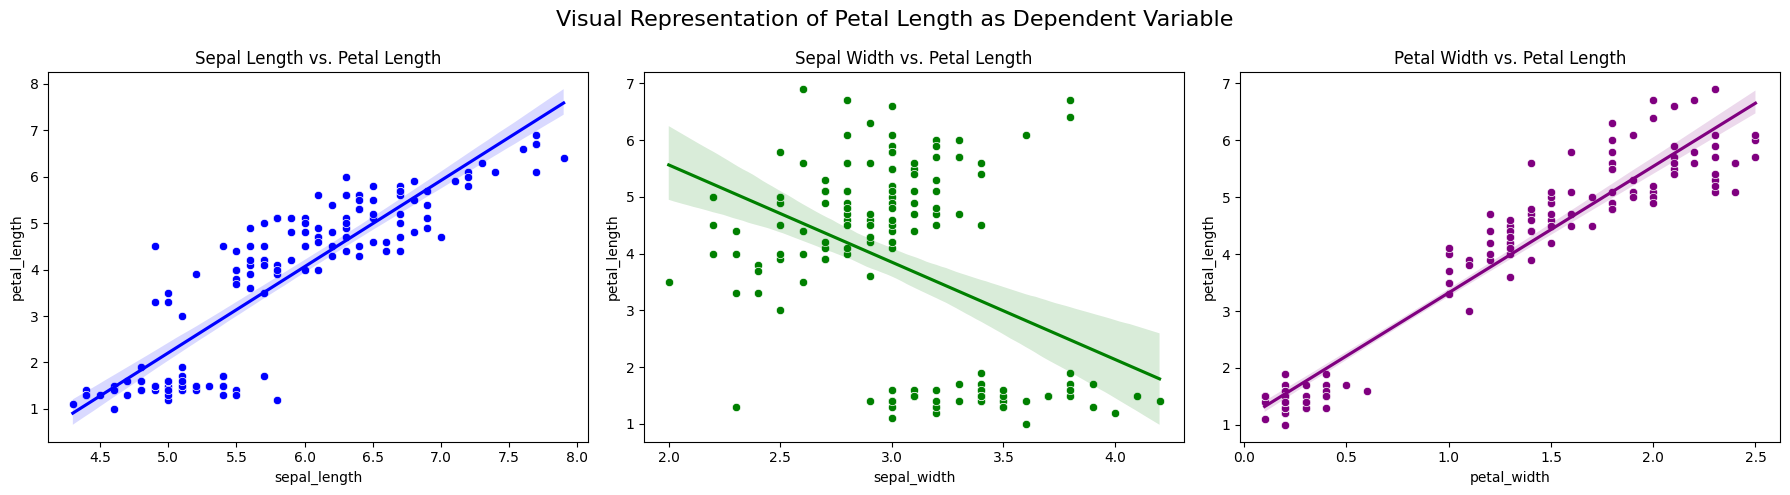

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for each feature vs. petal length
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for Sepal Length vs. Petal Length
sns.scatterplot(x='sepal_length', y='petal_length', data=iris_data, ax=axes[0], color="blue")
sns.regplot(x='sepal_length', y='petal_length', data=iris_data, ax=axes[0], scatter=False, color="blue")
axes[0].set_title('Sepal Length vs. Petal Length')

# Scatter plot for Sepal Width vs. Petal Length
sns.scatterplot(x='sepal_width', y='petal_length', data=iris_data, ax=axes[1], color="green")
sns.regplot(x='sepal_width', y='petal_length', data=iris_data, ax=axes[1], scatter=False, color="green")
axes[1].set_title('Sepal Width vs. Petal Length')

# Scatter plot for Petal Width vs. Petal Length
sns.scatterplot(x='petal_width', y='petal_length', data=iris_data, ax=axes[2], color="purple")
sns.regplot(x='petal_width', y='petal_length', data=iris_data, ax=axes[2], scatter=False, color="purple")
axes[2].set_title('Petal Width vs. Petal Length')

# Display the plots
plt.suptitle('Visual Representation of Petal Length as Dependent Variable', fontsize=16)
plt.tight_layout()
plt.show()
